<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Joshua!

I'm happy to review your project today.  🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments: </div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
    
Hello Joshua,

Another project successfully completed - well done! 🏆 Your consistent effort and progress are truly commendable.

Our team is here to help you keep pushing forward and honing your skills as you advance through the program.
    
You’ll find specific feedback in the notebook in the ‘Comments’ (`Reviewer's comment v1`) sections.
    
**What Was Great:**

- You demonstrated a thorough approach to data loading, preparation, and cleaning, ensuring the data was in optimal shape for analysis.

Congratulations again on your accomplishment! Each project you complete adds to your growing expertise, and it’s exciting to see you make such great strides. Keep up the great work! 🎯
    
PS: As a final note, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo

Another great self-paced course that covers basic concepts in probability and statistics - Probability and Statistics by Stanford Online or you could check this one An Introduction to Statistical Learning with Applications in R 🙌
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

<div class="alert alert-info">
<h2> Introduction </h2>

This data analysis project is based on data from a telecom operator company, Megaline. Megaline offers two distinct plans: Surf and Ultimate. Surf being the cheaper package at 20 USD monthly while the Ultimate plan costs 70 USD. Ultimate offers a significant increase in calling, texting and internet limits. The goal of this project is to analyze the behaviors of the customers to determine which plan brings Megaline more revenue so that they can adjust the advertising budget to focus more on the plan that brings in more revenue.
    
There are 2 hypotheses that will be tested in the analysis:
1. Null Hypothesis (H0): The average revenue from users of the Ultimate and Surf plans is the same.
    
   Alternative Hypothesis (H1): The average revenue from users of the Ultimate and Surf plans differs.
    
    
2. Null Hypothesis (H0): There is no difference in average revenue between users in the New York-Newark-Jersey City area and users from other regions.
    
   Alternative Hypothesis (H1): There is a difference in average revenue between users in the New York-    Newark-Jersey City area and users from other regions.


   
    
</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great job keeping the additional information about the project goal! Additionally, you could add a short description of the tasks you plan to perform and the available data. This information could be helpful for the notebook reader.



## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

## Load data

In [2]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

In [3]:
display(df_calls.head())
display(df_internet.head())
display(df_messages.head())
display(df_plans.head())
display(df_users.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [4]:
# Check for missing values in each DataFrame
print('Missing values before filling:')
display(df_calls.isna().sum(), "\n")
display(df_internet.isna().sum(), "\n")
display(df_messages.isna().sum(), "\n")
display(df_plans.isna().sum(), "\n")
display(df_users.isna().sum(), "\n")

Missing values before filling:


id           0
user_id      0
call_date    0
duration     0
dtype: int64

'\n'

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

'\n'

id              0
user_id         0
message_date    0
dtype: int64

'\n'

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

'\n'

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

'\n'

In [5]:
display(df_calls.count())
display(df_internet.count())
display(df_messages.count())
display(df_plans.count())
display(df_users.count())

id           137735
user_id      137735
call_date    137735
duration     137735
dtype: int64

id              104825
user_id         104825
session_date    104825
mb_used         104825
dtype: int64

id              76051
user_id         76051
message_date    76051
dtype: int64

messages_included        2
mb_per_month_included    2
minutes_included         2
usd_monthly_pay          2
usd_per_gb               2
usd_per_message          2
usd_per_minute           2
plan_name                2
dtype: int64

user_id       500
first_name    500
last_name     500
age           500
city          500
reg_date      500
plan          500
churn_date     34
dtype: int64

## Plans

In [6]:
# Print the general/summary information about the plans' DataFrame
df_plans.describe()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [7]:
# Print a sample of data for plans
df_plans.sample(2)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

In [8]:
df_plans[df_plans.duplicated()].count()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

## Fix data

[Fix obvious issues with the data given the initial observations.]

<div class="alert alert-info">
<h2> Student's comment </h2>
There are no obvious issues with this dataframe based on initial observations.

</div>

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [9]:
# Print the general/summary information about the users' DataFrame
display(df_users.describe())
df_users.info()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Print a sample of data for users
df_users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
177,1177,Seymour,Anderson,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-11-09,surf,NaN
381,1381,German,Burris,44,"Austin-Round Rock-Georgetown, TX MSA",2018-08-30,surf,NaN
159,1159,Dierdre,Baker,58,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-07-21,ultimate,NaN
100,1100,Aaron,Rowe,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-13,surf,NaN
328,1328,Tamesha,Huber,20,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-02-10,surf,NaN
486,1486,Sang,Solis,29,"Orlando-Kissimmee-Sanford, FL MSA",2018-12-05,surf,NaN
185,1185,Loria,Freeman,47,"Louisville/Jefferson County, KY-IN MSA",2018-01-14,ultimate,NaN
157,1157,Luciano,Sheppard,63,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-02,surf,NaN
210,1210,Shanae,Carrillo,30,"Oklahoma City, OK MSA",2018-06-01,surf,NaN
342,1342,Eugene,Patton,65,"Indianapolis-Carmel-Anderson, IN MSA",2018-10-21,surf,NaN


In [11]:
df_users[df_users.duplicated()].count()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [12]:
# Convert date columns in users_df
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

In [13]:
# Check for fully duplicated rows
df_users.duplicated().sum()

0

In [14]:
# Isolate city name by splitting at the first comma
df_users['city'] = df_users['city'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)

# Verify the cleaned 'city' column
display(df_users['city'].unique())

array(['Atlanta-Sandy Springs-Roswell', 'Seattle-Tacoma-Bellevue',
       'Las Vegas-Henderson-Paradise', 'Tulsa',
       'Dallas-Fort Worth-Arlington', 'San Francisco-Oakland-Berkeley',
       'Grand Rapids-Kentwood', 'Orlando-Kissimmee-Sanford',
       'San Jose-Sunnyvale-Santa Clara', 'Cleveland-Elyria',
       'Chicago-Naperville-Elgin', 'Knoxville',
       'New York-Newark-Jersey City', 'Pittsburgh', 'Fresno',
       'Washington-Arlington-Alexandria', 'Indianapolis-Carmel-Anderson',
       'Jacksonville', 'Los Angeles-Long Beach-Anaheim',
       'Omaha-Council Bluffs', 'Houston-The Woodlands-Sugar Land',
       'Philadelphia-Camden-Wilmington',
       'Tampa-St. Petersburg-Clearwater', 'Birmingham-Hoover',
       'Oklahoma City', 'Charlotte-Concord-Gastonia',
       'Denver-Aurora-Lakewood',
       'Nashville-Davidson–Murfreesboro–Franklin', 'Columbus',
       'Albuquerque', 'Boston-Cambridge-Newton',
       'Miami-Fort Lauderdale-West Palm Beach',
       'San Diego-Chula Vista-Ca

### Enrich Data

In [15]:
# Fill missing churn_date values with 'Active' to indicate active customers
df_users['churn_date'].fillna('Active', inplace=True)

# Verify that the missing values are handled
print(df_users['churn_date'].isnull().sum())

0


[Add additional factors to the data if you believe they might be useful.]

<div class="alert alert-info">
<h2> Student's comment </h2>
Converted reg_date and churn_date with pd.to_datetime() for easier processing when merging the data later in the project. Cleaned up 'city' column for easier handling later in the project when we compare and NY-NJ area revenue with the other regioins. Filled missing values in churn_date with 'Active' to avoid confusion and minimize potential analysis errors.
   

</div>

## Calls

In [16]:
# Print the general/summary information about the calls' DataFrame
display(df_calls.describe())
df_calls.info()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Print a sample of data for calls
df_calls.sample(10)
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [18]:
df_calls[df_calls.duplicated()].count()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [19]:
# Convert date columns in calls_df
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [20]:
# Check for fully duplicated rows
df_calls.duplicated().sum()

0

In [21]:
# Convert the duration column to integer type for consistency
df_calls['duration'] = df_calls['duration'].astype(int)

# Round up each call duration to the nearest minute
df_calls['duration'] = np.ceil(df_calls['duration'])

# Verify the changes
display(df_calls['duration'].head())

0     8.0
1    13.0
2    14.0
3     5.0
4     4.0
Name: duration, dtype: float64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Great job! Good that you did not forget about data rounding. Also, great choice of `np.ceil ()` function.


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

<div class="alert alert-info">
<h2> Student's comment </h2>
Cleaned up 'df_calls' by converting date column with pd.to_datetime(), checked for duplicates and converted the 'duration' column into integer with .astype(int). Based on the sample, the 'duration' column must be fixed as they are not yet rounded up to the nearest integer and include decimals. Rounded up each call duration to the nearest value per Megaline's instructions with np.ceil(). 

</div>

## Messages

In [22]:
# Print the general/summary information about the messages' DataFrame
display(df_messages.describe())
df_messages.info()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Print a sample of data for messages
df_messages.sample(10)


,id,user_id,message_date
11663,1079_62,1079,2018-10-30
33023,1205_98,1205,2018-12-13
42024,1271_2,1271,2018-12-25
33385,1211_61,1211,2018-09-19
39332,1255_560,1255,2018-09-30
37578,1249_41,1249,2018-10-02
41999,1270_212,1270,2018-11-28
13314,1088_303,1088,2018-07-02
9219,1067_77,1067,2018-12-12
4914,1045_266,1045,2018-11-06


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [24]:
# Convert date columns in calls_df
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

<div class="alert alert-info">
<h2> Student's comment </h2>
For 'df_messages', there were no particular red flags with the data based on initial observations other than converting the 'message_date' column with pd.to_datetime for consistency and easier processing if needed.

</div>

## Internet

In [25]:
# Print the general/summary information about the internet DataFrame
display(df_internet.describe())
df_internet.info()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [26]:
# Print a sample of data for the internet traffic
df_internet.sample(10)

,id,user_id,session_date,mb_used
30037,1138_269,1138,2018-05-28,0.00
16360,1073_285,1073,2018-10-30,295.61
8613,1045_186,1045,2018-11-26,175.32
101213,1482_57,1482,2018-11-25,508.96
20846,1097_84,1097,2018-11-01,587.48
38225,1171_596,1171,2018-09-26,317.70
60743,1277_46,1277,2018-09-13,785.07
37779,1171_150,1171,2018-05-06,23.63
16320,1073_236,1073,2018-06-14,0.00
19672,1088_516,1088,2018-10-24,0.00


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [27]:
# Convert date columns in calls_df
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [28]:
# Add separate month and year columns to group by
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['year'] = df_internet['session_date'].dt.year

# Calculate monthly total usage in gigabytes, rounded up
# Group by user_id, year, and month, sum mb_used, and convert to GB
df_internet_monthly = (
    df_internet.groupby(['user_id', 'year', 'month'], as_index=False)['mb_used']
    .sum()
)
df_internet_monthly['gb_used'] = np.ceil(df_internet_monthly['mb_used'] / 1024)

# Preview the result
display(df_internet_monthly.head())

,user_id,year,month,mb_used,gb_used
0,1000,2018,12,1901.47,2.0
1,1001,2018,8,6919.15,7.0
2,1001,2018,9,13314.82,14.0
3,1001,2018,10,22330.49,22.0
4,1001,2018,11,18504.30,19.0


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
Everything is correct here, but it is always helpful to double-check whether we indeed have data within one year/time period. If not, then selecting and aggregating data by the month number will cause an issue. It is safer to use datetime64[M], which provides a complete date.

Additionally, you could achieve the same using the following code: 
    
```    
calls['call_date'].dt.to_period('M')
```

<div class="alert alert-info">
<h2> Student's comment </h2>
Converted 'session_date' column with pd.to_datetime(). Based on the sample, 'mb_used' is not in the correct format as they are still in mb for each individual user. Rounded up the monthly total for 'mb_used' data to GB as per Megaline instructions.

</div>

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

<div class="alert alert-info">
<h2> Megaline Plans </h2>
Surf 
    
1. Monthly charge - 20 USD
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
    - 1 minute: 3 cents
    - 1 text message: 3 cents
    - 1 GB of data: $10
    
Ultimate

1. Monthly charge - 70 USD
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
    - 1 minute: 1 cent
    - 1 text message: 1 cent
    - 1 GB of data: 7 USD
</div>

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here. 

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [29]:
# Calculate the number of calls made by each user per month. Save the result.
df_calls['month'] = df_calls['call_date'].dt.month
df_calls['year'] = df_calls['call_date'].dt.year
calls_agg = df_calls.groupby(['user_id', 'year', 'month']).agg({'duration': 'sum', 'id': 'count'}).reset_index()
calls_agg.rename(columns={'duration': 'total_minutes', 'id': 'total_calls'}, inplace=True)


In [30]:
# Calculate the amount of minutes spent by each user per month. Save the result.
# Extract year and month for grouping
df_calls['year'] = df_calls['call_date'].dt.year
df_calls['month'] = df_calls['call_date'].dt.month

# Calculate the total minutes spent per user per month and save to a new column in df_calls
df_calls['total_minutes'] = df_calls.groupby(['user_id', 'year', 'month'])['duration'].transform('sum')

# Verify the result
display(df_calls[['user_id', 'year', 'month', 'total_minutes']].drop_duplicates().head())


,user_id,year,month,total_minutes
0,1000,2018,12,108.0
16,1001,2018,9,278.0
17,1001,2018,10,348.0
19,1001,2018,12,368.0
22,1001,2018,11,379.0


<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v1:</b>
    
In pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:


```
# Group by and aggregate
result = calls_df.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']}).reset_index()

# Flatten the MultiIndex in columns
result.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in result.columns.values]
result
```

In [31]:
# Calculate the number of messages sent by each user per month. Save the result.
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages['month'] = df_messages['message_date'].dt.month
df_messages['year'] = df_messages['message_date'].dt.year
messages_agg = df_messages.groupby(['user_id', 'year', 'month']).size().reset_index(name='total_messages')


In [32]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
# Use the preprocessed internet data for data usage per user per month
internet_agg = df_internet_monthly[['user_id', 'year', 'month', 'gb_used']]

display(internet_agg.head())

,user_id,year,month,gb_used
0,1000,2018,12,2.0
1,1001,2018,8,7.0
2,1001,2018,9,14.0
3,1001,2018,10,22.0
4,1001,2018,11,19.0


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [33]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
monthly_data = calls_agg.merge(messages_agg, on=['user_id', 'year', 'month'], how='outer')
monthly_data = monthly_data.merge(internet_agg, on=['user_id', 'year', 'month'], how='outer')


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct. Indeed, we need to use an `outer` join here.

In [34]:
# Add the plan information
monthly_data = monthly_data.merge(df_users[['user_id', 'plan', 'city']], on='user_id', how='left')
display(monthly_data.head())
display(monthly_data.count())

,user_id,year,month,total_minutes,total_calls,total_messages,gb_used,plan,city
0,1000,2018,12,108.0,16.0,11.0,2.0,ultimate,Atlanta-Sandy Springs-Roswell
1,1001,2018,8,160.0,27.0,30.0,7.0,surf,Seattle-Tacoma-Bellevue
2,1001,2018,9,278.0,49.0,44.0,14.0,surf,Seattle-Tacoma-Bellevue
3,1001,2018,10,348.0,65.0,53.0,22.0,surf,Seattle-Tacoma-Bellevue
4,1001,2018,11,379.0,64.0,36.0,19.0,surf,Seattle-Tacoma-Bellevue


user_id           2293
year              2293
month             2293
total_minutes     2258
total_calls       2258
total_messages    1806
gb_used           2277
plan              2293
city              2293
dtype: int64

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [35]:
def calculate_monthly_revenue(row):
    if row['plan'] == 'surf':
        # Surf Plan Details
        monthly_charge = 20
        free_minutes = 500
        free_texts = 50
        free_data_gb = 15  # 15 GB
        extra_minute_charge = 0.03  # 3 cents
        extra_text_charge = 0.03  # 3 cents
        extra_data_charge = 10  # $10 per GB
    elif row['plan'] == 'ultimate':
        # Ultimate Plan Details
        monthly_charge = 70
        free_minutes = 3000
        free_texts = 1000
        free_data_gb = 30  # 30 GB
        extra_minute_charge = 0.01  # 1 cent
        extra_text_charge = 0.01  # 1 cent
        extra_data_charge = 7  # $7 per GB

    # Calculate extras
    extra_minutes = max(0, row['total_minutes'] - free_minutes)
    extra_texts = max(0, row['total_messages'] - free_texts)
    extra_data_gb = max(0, row['gb_used'] - free_data_gb)

    # Calculate extra charges
    minutes_charge = extra_minutes * extra_minute_charge
    messages_charge = extra_texts * extra_text_charge
    data_charge = extra_data_gb * extra_data_charge

    # Total revenue calculation
    total_revenue = monthly_charge + minutes_charge + messages_charge + data_charge

    return total_revenue

# Apply the revenue calculation function to each row in the DataFrame
monthly_data['monthly_revenue'] = monthly_data.apply(calculate_monthly_revenue, axis=1)

# Verify the calculated monthly revenue
display(monthly_data[['user_id', 'plan', 'monthly_revenue']].sample(10))
display(monthly_data.count())

,user_id,plan,monthly_revenue
1457,1324,surf,104.28
797,1171,surf,80.00
1124,1246,ultimate,70.00
1104,1241,surf,20.00
32,1009,surf,114.29
113,1031,ultimate,70.00
1101,1240,surf,307.10
1258,1272,surf,20.00
351,1075,surf,20.93
390,1082,surf,23.63


user_id            2293
year               2293
month              2293
total_minutes      2258
total_calls        2258
total_messages     1806
gb_used            2277
plan               2293
city               2293
monthly_revenue    2293
dtype: int64

<div class="alert alert-info">
<h2> Data Preprocessing Conclusion </h2>
Not all of the dataframes in the data had issues but some did that had to be addressed prior to the analysis. First, the 'city' names in 'df_users' had to be cleaned up in order make it easier to compare the revenue between users in NY-NJ area and other regions. Next, 'churn_date' contained missing values as these users were still active so these values were filled with the string 'Active' so that the missing values do not interfere with the analysis. All the date columns within the dataframes have been converted with pd.to_datetime() for easier handling and parsing. The 'duration' column in 'df_calls' was fixed and rounded up to meet Megaline requirements. The column 'mb_used' in 'df_internet' was also processed by summing the monthly total usage and rounding it to the nearest GB. Finally, monthly revenue was calculated for each user based on their mobile plans by aggregating the data per user.

</div>

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>

Everything is correct here.

Btw it is also possible to make the calculation of revenue a bit different `np.where` - https://numpy.org/doc/stable/reference/generated/numpy.where.html
    
```
np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```

    
Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using `.clip()` (a useful method in many tasks). You can read it here: https://www.pythonpool.com/numpy-clip/
 
Also, it is better to avoid hard-coding in your functions of all values from the data plans. These values could be frequently updated and it will be annoyingly inconvenient to update them once again in the function. I would recommend using an actual table with values or create a separate data dictionary - https://towardsdatascience.com/12-examples-to-master-python-dictionaries-5a8bcd688c6d

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

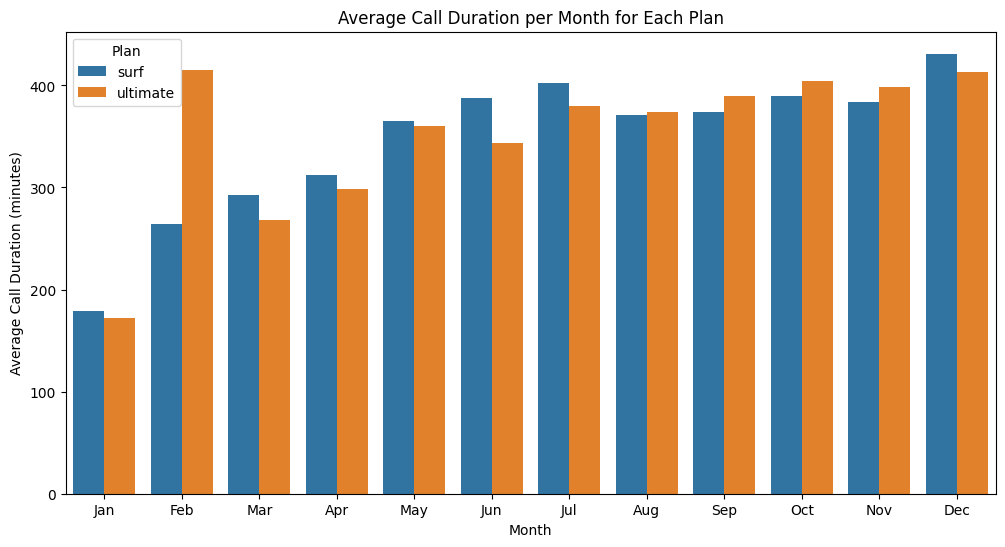

In [36]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# Calculate the average call duration per plan per month
avg_call_duration_per_plan_month = (
    monthly_data.groupby(['plan', 'month'])['total_minutes']
    .mean()
    .reset_index()
)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_call_duration_per_plan_month,
    x='month',
    y='total_minutes',
    hue='plan'
)
plt.title("Average Call Duration per Month for Each Plan")
plt.xlabel("Month")
plt.ylabel("Average Call Duration (minutes)")
plt.legend(title="Plan")
plt.xticks(range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


<div class="alert alert-info">
<h2> Student's comment </h2>
Based on the graph, both Surf and Ultimate plan users seem to follow a similar trend. Phone call duration starts off lower in the beginning of the year (<200 for both plans in January) and gradually increases as the months go by. This can possibly be explained by there being more holidays in the later months such as October, November and December so users are calling more family members and friends during this time leading to more chances for longer phone calls. However, there is a significant spike in call duration for Ultimate plan users during February.
</div>

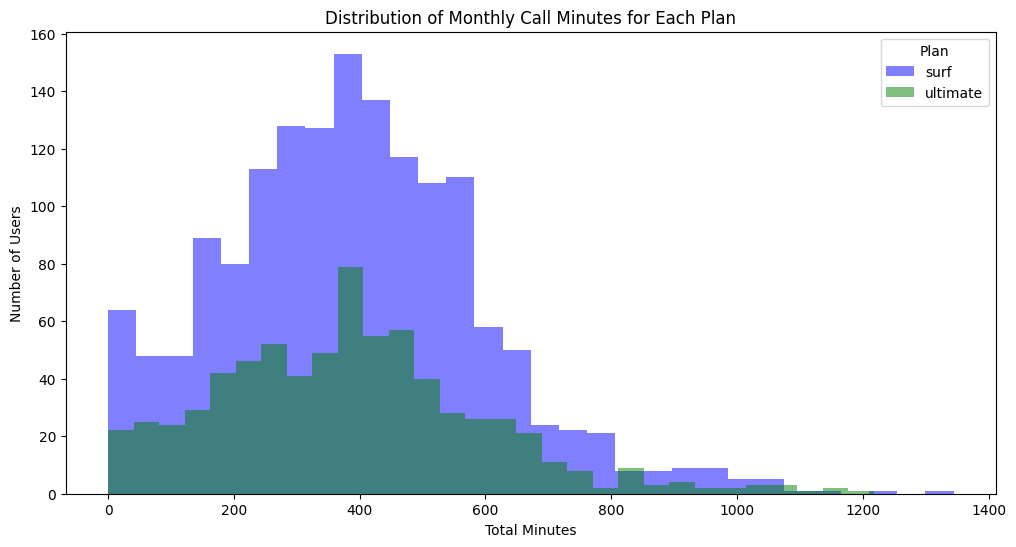

In [37]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# Filter data for each plan
surf_minutes = monthly_data[monthly_data['plan'] == 'surf']['total_minutes']
ultimate_minutes = monthly_data[monthly_data['plan'] == 'ultimate']['total_minutes']

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(surf_minutes, bins=30, alpha=0.5, label='surf', color='blue')
plt.hist(ultimate_minutes, bins=30, alpha=0.5, label='ultimate', color='green')

# Adding labels and title
plt.title("Distribution of Monthly Call Minutes for Each Plan")
plt.xlabel("Total Minutes")
plt.ylabel("Number of Users")
plt.legend(title="Plan")

plt.show()


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

<div class="alert alert-info">
<h2> Student's comment </h2>
Based on the graph, the distribution of call minutes required by users of each plan are very similar where the peak number of users require around 400 total minutes of call time. This suggests that Ultimate plan users are not fully utilizing the higher plan limit of 3000 minutes while most Surf plan users do as their limit is 500 minutes. Note that the Surf plan also clearly has more users, likely due to the lower cost of the plan. The graph also shows despite most Surf plan users using less than 500 minutes, many still exceed their limit. The surf plan has a higher overage charge of 3 cents per minute compared to the 1 cent per minute in the Ultimate plan. It may be likely that the Surf plan generates more consistent revenue when it comes to overage charges for phone call limits compared to the Ultimate plan as very few people if any exceed the 3000 minute limit.
</div>

In [38]:
# Calculate the mean and the variance of the monthly call duration
call_duration_stats = monthly_data.groupby('plan')['total_minutes'].agg(['mean', 'var'])

# Display the statistics
display(call_duration_stats)

,mean,var
plan,,
surf,387.940453,41840.369509
ultimate,386.042076,44938.725755


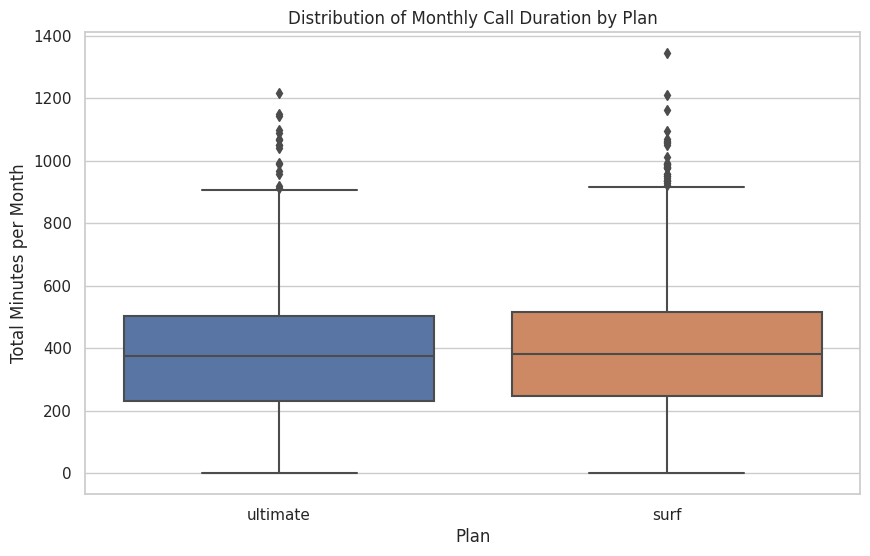

In [39]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Set plot style
sns.set(style="whitegrid")

# Plot boxplot for monthly call duration (total_minutes) by plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_data, x='plan', y='total_minutes')

# Add title and labels
plt.title("Distribution of Monthly Call Duration by Plan")
plt.xlabel("Plan")
plt.ylabel("Total Minutes per Month")

# Show plot
plt.show()


[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

<div class="alert alert-info">
<h2> Student's comment </h2>
The mean call durations for Surf and Ultimate are nearly identical. This indicates that, on average, users of both plans have similar calling needs. This similarity suggests the idea that calling time may not be a primary factor influencing users' plan choices. Surf has a slightly lower variance than Ultimate. This suggests that Surf users’ call durations are more consistent, clustering closer to the mean, but Ultimate users show a bit more variability in their monthly call duration. This could imply that Surf users tend to be more mindful of staying within the 500-minute limit to avoid extra charges, whereas Ultimate users may feel less constrained given their much higher limit. Since Surf users are consistently close to the 500-minute limit, they might contribute more to revenue from overage charges compared to Ultimate users. The box-plot for the distribution of monthly call duration between plans are very similar despite the 2500 minute difference in limit so Megaline customers behave similarly when it comes to their calling duration no matter what plan they have. 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
To avoid repetitive code you could utilize functions. 

### Messages

Message statistics per plan:
                mean  median          var
plan                                    
surf      40.109656    32.0  1091.344231
ultimate  46.296233    41.0  1085.183108


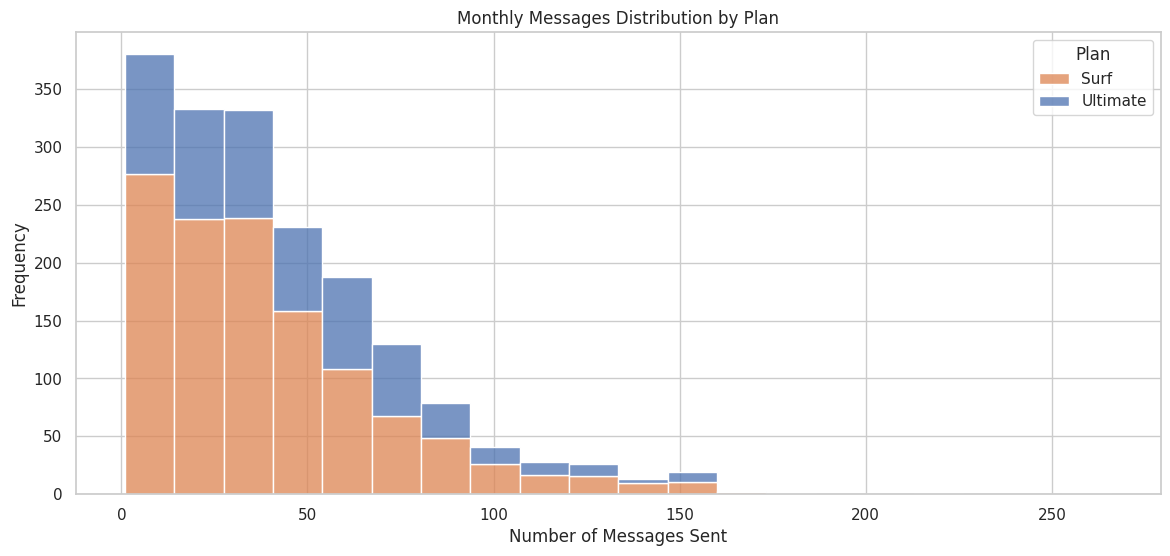

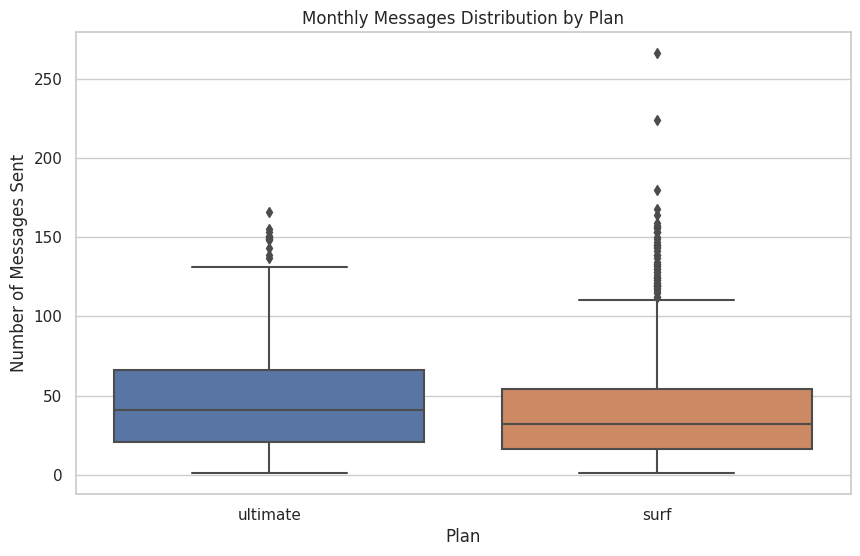

In [40]:
# Compare the number of messages users of each plan tend to send each month
message_stats = monthly_data.groupby('plan')['total_messages'].agg(['mean', 'median', 'var'])
print("Message statistics per plan:\n", message_stats)

# Plotting histograms
plt.figure(figsize=(14, 6))
sns.histplot(data=monthly_data, x='total_messages', hue='plan', multiple='stack', bins=20)
plt.title('Monthly Messages Distribution by Plan')
plt.xlabel('Number of Messages Sent')
plt.ylabel('Frequency')
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])
plt.show()

# Plotting boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_data, x='plan', y='total_messages')
plt.title('Monthly Messages Distribution by Plan')
plt.xlabel('Plan')
plt.ylabel('Number of Messages Sent')
plt.show()


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

<div class="alert alert-info">
<h2> Student's comment </h2>
The Ultimate plan users have a higher mean and median (46.30, 41.0) than Surf plan users (40.11, 32.0). This suggests that Ultimate plan users are more active in sending texts, likely due to the 1000 text message limit so they are not as averse to a risk of overage charges. Keep in mind that Surf plan users only have a 50 text limit with a higher overage charge of 3 cents per text compared to 1 cent per text for Ultimate users. All of the Ultimate plan users are nowhere near the 1000 text message limit, whereas many Surf plan users exceed the 50 text limit as seen in the histogram and box-plot. The box-plot displays that the Surf plan data has more outliers with some users exceeding 200 texts per month. This suggests that although the Ultimate plan creates more consistent revenue with the higher monthly fee, the Surf plan also generates a lot of revenue from the overage charges.

### Internet

Internet traffic statistics per plan:
                mean  median        var
plan                                  
surf      16.831194    17.0  59.473734
ultimate  17.331015    17.0  58.494733


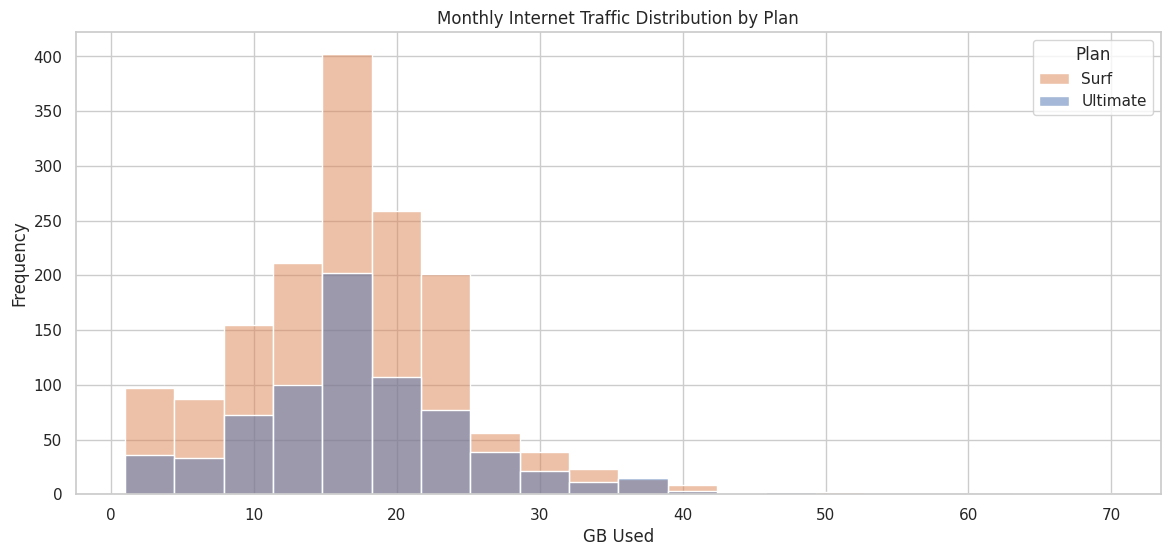

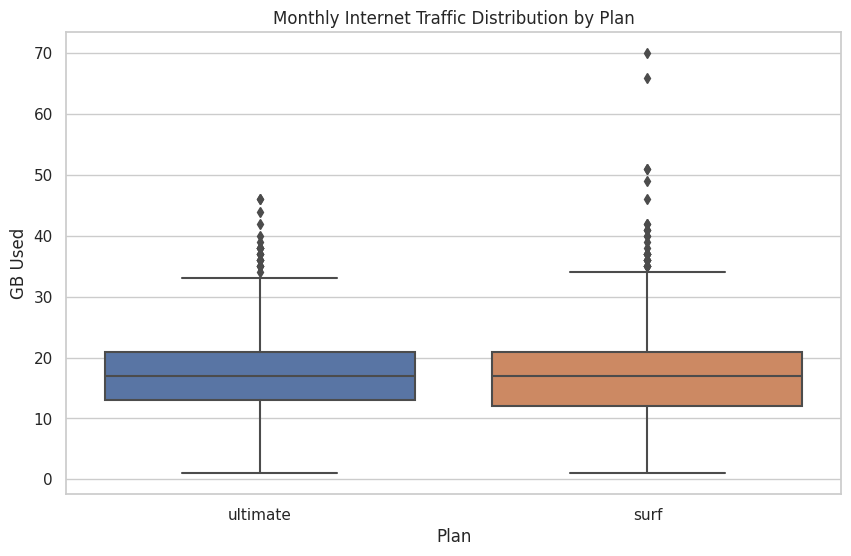

In [41]:
# Compare the amount of internet traffic consumed by users per plan
# Calculate descriptive statistics for internet usage per plan
internet_stats = monthly_data.groupby('plan')['gb_used'].agg(['mean', 'median', 'var'])
print("Internet traffic statistics per plan:\n", internet_stats)

# Plot histogram to visualize the distribution of internet usage by plan
plt.figure(figsize=(14, 6))
sns.histplot(data=monthly_data, x='gb_used', hue='plan', bins=20)
plt.title('Monthly Internet Traffic Distribution by Plan')
plt.xlabel('GB Used')
plt.ylabel('Frequency')
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])
plt.show()

# Plot boxplot to visualize the distribution of internet usage by plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_data, x='plan', y='gb_used')
plt.title('Monthly Internet Traffic Distribution by Plan')
plt.xlabel('Plan')
plt.ylabel('GB Used')
plt.show()


[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

<div class="alert alert-info">
<h2> Student's comment </h2>
Based on the mean and variance and box-plot of both plans, users tend to consumer a very similar amount of data despite the difference in limits. However, the box-plot also reveals that there are more outliers for the Surf plan with some users even exceeding 60 GB of data per month. The overage charge for the Surf plan is 3 more dollars per GB (7 USD for Ultimate and 10 USD for Surf). The distribution of the monthly internet traffic based on the histograms are also very similar with both plans peaking at around 15 GB per month. This suggests that many Surf users are right on the monthly limit and many are exceeding it resulting in overage charges that may increase revenue significantly.
</div>

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

Revenue statistics per plan:
                mean  median          var
plan                                    
surf      59.994094    40.0  3040.956283
ultimate  72.313889    70.0   129.848486


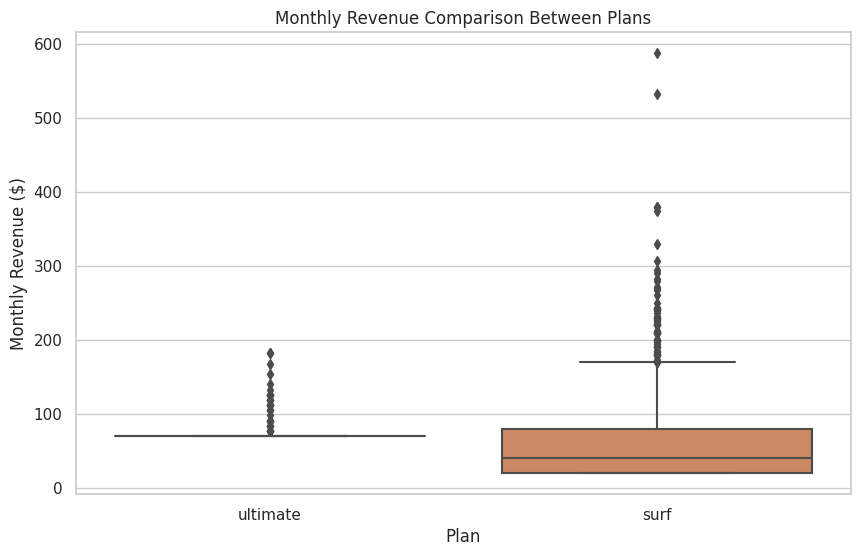

In [42]:
revenue_stats = monthly_data.groupby('plan')['monthly_revenue'].agg(['mean', 'median', 'var'])
print("Revenue statistics per plan:\n", revenue_stats)
# Create the boxplot for monthly revenue by plan type
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_data, x='plan', y='monthly_revenue')

# Label the plot
plt.title('Monthly Revenue Comparison Between Plans')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue ($)')
plt.show()

<div class="alert alert-info">
<h2> Student's comment </h2>
As suspected based on the previous analysis of call, text and internet usage between each plan and looking at the revenue box-plot: Ultimate plan generates a more consistent higher average monthly revenue per user (72.31) compared to the Surf plan (59.99), likely driven by the higher monthly fee of 70 USD to 20 USD. However, we can see that the overage charges due to the significantly lower limits add a considerable amount of revenue to the Surf plan as the average is close to 60, only 12 less than the average revenue for the Ultimate plan. Revenue distribution for Surf users is broader and more variable as seen in the difference between the variances of the two plans. Some Surf plan users regularly exceed the plan’s limits on calls, messages, or data. These additional charges create a wider revenue range, where certain high-usage months may result in revenue figures closer to that of Ultimate plan users. The box-plot also shows this huge variance in Surf plan revenue compared to the Ultimate revenue. 

</div>

[Formulate conclusions about how the revenue differs between the plans.]

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. It's great that you combined both plans in one graph for comparison and also used different graph types to check the available data.
- If you have time and are willing to practice, you can display two charts (a histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [43]:
# Test the hypotheses
# Separate revenue data by plan
surf_revenue = monthly_data[monthly_data['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = monthly_data[monthly_data['plan'] == 'ultimate']['monthly_revenue']

# Conduct the two-sample t-test
t_stat, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Output the result
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average revenue between the plans.")
else:
    print("Fail to reject the null hypothesis. No significant difference in average revenue between the plans.")


T-statistic: -8.4741
P-value: 0.0000
Reject the null hypothesis. There is a significant difference in average revenue between the plans.


<div class="alert alert-info">
<h2> Student's comment </h2>
Chose two-sample t-test as we are comparting the means of two independent groups. Chose a 5% significance level. Since the p-value is less than the alpha value chosen, the null hypothesis is rejected. There is a significant difference in average revenue between the plans. The negative T-statistic indicates that the average revenue of the Ultimate plan is higher than that of the Surf plan which supports the results in the monthly_revenue analysis. 
</div>

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [44]:
# Test the hypotheses
# Define the groups based on the city
ny_area = ['New York-Newark-Jersey City']  # Modify this based on exact city names in your data
ny_users_revenue = monthly_data[monthly_data['city'].isin(ny_area)]['monthly_revenue']
other_users_revenue = monthly_data[~monthly_data['city'].isin(ny_area)]['monthly_revenue']

# Conduct an independent t-test
t_stat, p_value = stats.ttest_ind(ny_users_revenue, other_users_revenue, equal_var=False)

# Step 3: Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpretation of results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average revenue.")
else:
    print("Fail to reject the null hypothesis. No significant difference in average revenue.")


T-statistic: -2.1832
P-value: 0.0294
Reject the null hypothesis. There is a significant difference in average revenue.


<div class="alert alert-info">
<h2> Student's comment </h2>
Chose two-sample t-test as we are comparing the means of two independent groups. Chose a 5% significance level. Since the p-value is less than the alpha value chosen, the null hypothesis is rejected. There is a significant difference in average revenue between the NY-NJ region compared to other regions. The negative T-statistic indicates that the average revenue of the other regions are higher than that of the NY-NJ regions.

</div>

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Everything is correct here. Hypotheses have been formulated correctly. 
- Second one should be still updated based on the new filtering logic i've shared. 
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)
    

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

<div class="alert alert-info">
<h2> Conclusion </h2>
This analysis of Megaline's Surf and Ultimate plans provides valuable insights into customer behavior, revenue generation, and regional differences. As stated in the introduction, the main goal of this analysis was to determine which plan generates more revenue to optimize Megaline's advertising.

After cleaning and preparing the data, including adjustments to city names, churn date, and data rounding for calls and internet usage, we calculated monthly revenue per user. Examining call usage, we found that users of both plans exhibit similar calling behavior, with mean call durations nearly identical. However, Surf users are more clustered around their 500-minute limit, likely to avoid overage charges while utilizing most of their limit, while Ultimate users display slightly more variability in monthly call duration due to the higher 3000-minute limit.

For messaging and internet usage, Ultimate plan users benefit from generous limits, leading to fewer overage charges compared to Surf users. Despite this, revenue from Surf users is increased by these overage charges, which often elevate their monthly fees close to those of Ultimate plan users. Nevertheless, the Ultimate plan consistently brings in higher revenue per user, with an average of 72.31 USD versus 59.99 USD for Surf.

Hypothesis testing confirmed significant differences in revenue between the plans and between users in the New York-Newark-Jersey City area and other regions. The Ultimate plan yields more consistent revenue due to its higher monthly fee, while the Surf plan’s revenue is more variable, largely dependent on additional charges.

In conclusion, while overage charges from Surf users contribute to revenue, the Ultimate plan is the more consistent and profitable option. Thus, focusing marketing efforts on the Ultimate plan may maximize long-term revenue.
</div>

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusions. It is very structured and provides insights about what you accomplished and recommendations to the business.
    